## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

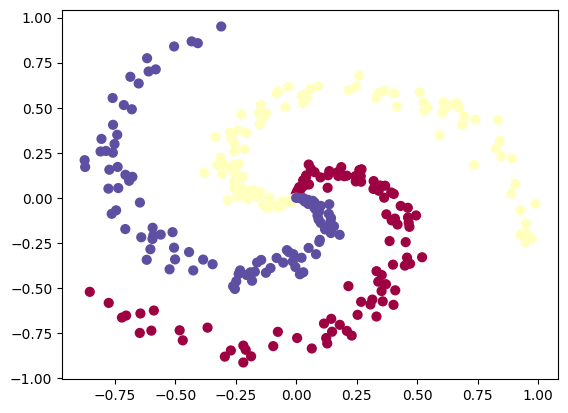

In [23]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [32]:
import numpy as np

def calculate_scores(X, W, b):
    """
    Calculates linear classifier scores.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    W : np.ndarray
        Weight matrix (n_classes, n_features)
    b : np.ndarray or float
        Bias term (n_classes,)

    Returns:
    np.ndarray:
        Linear scores (n_samples, n_classes)
    """
    # Calculate the scores using the formula: XW^T + b
    return np.dot(X, W.T) + b

# Example usage for Task 1:
X_example = np.array([[0.2, 0.8], [0.5, 0.5]])  # Two samples, two features
W_example = np.array([[0.4, 0.6], [0.1, 0.9]])  # Two classes, two features
b_example = np.array([0.1, 0.2])  # Bias for each class

scores = calculate_scores(X_example, W_example, b_example)
print("Calculated Scores:\n", scores)

Calculated Scores:
 [[0.66 0.94]
 [0.6  0.7 ]]


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [33]:
def hinge_loss(X, y, W, b):
    """
    Computes hinge loss for binary classification.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    y : np.ndarray
        True labels (n_samples,), +1 or -1 for binary classification
    W : np.ndarray
        Weight matrix (n_features,)
    b : float
        Bias term (scalar)

    Returns:
    float:
        Hinge loss value
    """
    scores = calculate_scores(X, W, b)
    margins = np.maximum(0, 1 - y * scores)
    return np.mean(margins)

def softmax_loss(X, y, W, b):
    """
    Computes softmax cross-entropy loss for multiclass classification.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    y : np.ndarray
        True labels (n_samples,), class indices (0, 1, 2,...)
    W : np.ndarray
        Weight matrix (n_classes, n_features)
    b : np.ndarray
        Bias for each class (n_classes,)

    Returns:
    float:
        Softmax loss value
    """
    scores = calculate_scores(X, W, b)
    scores -= np.max(scores, axis=1, keepdims=True)  # For numerical stability
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_logprobs = -np.log(probs[np.arange(len(y)), y])
    return np.mean(correct_logprobs)

# Example usage for Task 2:
X_example = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
y_hinge = np.array([1, -1, 1])  # Binary labels
y_softmax = np.array([0, 1, 2])  # Multiclass labels
W_hinge = np.array([0.4, 0.6])
W_softmax = np.array([[0.4, 0.6], [0.1, 0.9], [0.7, 0.3]])
b_hinge = 0.1
b_softmax = np.array([0.1, 0.2, 0.3])

hinge_loss_value = hinge_loss(X_example, y_hinge, W_hinge, b_hinge)
softmax_loss_value = softmax_loss(X_example, y_softmax, W_softmax, b_softmax)

print("Hinge Loss (without regularization):", hinge_loss_value)
print("Softmax Loss (without regularization):", softmax_loss_value)

Hinge Loss (without regularization): 0.8066666666666666
Softmax Loss (without regularization): 1.0330516039575708


### Task 3: Regularization
Add L2 regularization to your loss function.

In [34]:
def hinge_loss_with_regularization(X, y, W, b, reg_strength):
    """
    Computes hinge loss with L2 regularization for binary classification.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    y : np.ndarray
        True labels (n_samples,), +1 or -1 for binary classification
    W : np.ndarray
        Weight matrix (n_features,)
    b : float
        Bias term (scalar)
    reg_strength : float
        L2 regularization strength

    Returns:
    float:
        Hinge loss with L2 regularization
    """
    loss = hinge_loss(X, y, W, b)
    regularization_loss = (reg_strength / 2) * np.sum(W**2)
    return loss + regularization_loss

def softmax_loss_with_regularization(X, y, W, b, reg_strength):
    """
    Computes softmax loss with L2 regularization for multiclass classification.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    y : np.ndarray
        True labels (n_samples,), class indices (0, 1, 2,...)
    W : np.ndarray
        Weight matrix (n_classes, n_features)
    b : np.ndarray
        Bias for each class (n_classes,)
    reg_strength : float
        L2 regularization strength

    Returns:
    float:
        Softmax loss with L2 regularization
    """
    loss = softmax_loss(X, y, W, b)
    regularization_loss = (reg_strength / 2) * np.sum(W**2)
    return loss + regularization_loss

# Example usage for Task 3:
reg_strength = 0.1
hinge_loss_reg_value = hinge_loss_with_regularization(X_example, y_hinge, W_hinge, b_hinge, reg_strength)
softmax_loss_reg_value = softmax_loss_with_regularization(X_example, y_softmax, W_softmax, b_softmax, reg_strength)

print("Hinge Loss (with L2 regularization):", hinge_loss_reg_value)
print("Softmax Loss (with L2 regularization):", softmax_loss_reg_value)

Hinge Loss (with L2 regularization): 0.8326666666666667
Softmax Loss (with L2 regularization): 1.1290516039575709


### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [37]:
def gradient_descent(X, y, W, b, loss_function, learning_rate, num_iterations, reg_strength):
    """
    Performs gradient descent to optimize the weight and bias.

    Parameters:
    X : np.ndarray
        Feature matrix (n_samples, n_features)
    y : np.ndarray
        True labels (n_samples,)
    W : np.ndarray
        Initial weight matrix (n_features,) or (n_classes, n_features)
    b : float or np.ndarray
        Initial bias term
    loss_function : str
        Loss function to minimize ("hinge" or "softmax")
    learning_rate : float
        Learning rate for gradient descent
    num_iterations : int
        Number of iterations
    reg_strength : float
        Regularization strength

    Returns:
    W : np.ndarray
        Optimized weight matrix
    b : float or np.ndarray
        Optimized bias term
    """
    for i in range(num_iterations):
        # Compute gradient based on the loss function
        if loss_function == "hinge":
            loss, dW, db = hinge_loss_with_gradient(X, y, W, b, reg_strength)
        else:  # Softmax loss
            loss, dW, db = softmax_loss_with_gradient(X, y, W, b, reg_strength)
        
        # Print loss for debugging purposes
        print(f"Iteration {i}, Loss: {loss}")
        
        # Update weights and bias using the computed gradients
        W -= learning_rate * dW
        b -= learning_rate * db

    return W, b


def hinge_loss_with_gradient(X, y, W, b, reg_strength):
    """
    Computes hinge loss and its gradient for gradient descent.

    Returns:
    - loss: Hinge loss with regularization
    - dW: Gradient of the loss with respect to W
    - db: Gradient of the loss with respect to b
    """
    scores = np.dot(X, W) + b
    margins = np.maximum(0, 1 - y * scores)
    
    # Hinge loss
    loss = np.mean(margins) + reg_strength * np.sum(W ** 2)
    
    # Gradient calculation
    mask = margins > 0
    dW = -np.dot(X.T, (y * mask)) / X.shape[0] + 2 * reg_strength * W
    db = -np.mean(y * mask)

    return loss, dW, db


def softmax_loss_with_gradient(X, y, W, b, reg_strength):
    """
    Computes softmax loss and its gradient for gradient descent.

    Returns:
    - loss: Softmax loss with regularization
    - dW: Gradient of the loss with respect to W
    - db: Gradient of the loss with respect to b
    """
    scores = np.dot(X, W.T) + b
    scores -= np.max(scores, axis=1, keepdims=True)  # For numerical stability

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    num_samples = X.shape[0]
    
    # Softmax loss
    correct_class_probs = probs[np.arange(num_samples), y]
    loss = -np.mean(np.log(correct_class_probs)) + reg_strength * np.sum(W ** 2)

    # Gradient calculation
    dprobs = probs
    dprobs[np.arange(num_samples), y] -= 1
    dW = np.dot(dprobs.T, X) / num_samples + 2 * reg_strength * W
    db = np.mean(dprobs, axis=0)

    return loss, dW, db

# Example usage for Task 4:
learning_rate = 0.01
num_iterations = 100
reg_strength = 0.1

# Gradient Descent for Hinge Loss
W_optimized_hinge, b_optimized_hinge = gradient_descent(X_example, y_hinge, W_hinge, b_hinge, "hinge", learning_rate, num_iterations, reg_strength)

# Gradient Descent for Softmax Loss
W_optimized_softmax, b_optimized_softmax = gradient_descent(X_example, y_softmax, W_softmax, b_softmax, "softmax", learning_rate, num_iterations, reg_strength)

print("Optimized Hinge Weights and Bias:", W_optimized_hinge, b_optimized_hinge)
print("Optimized Softmax Weights and Bias:", W_optimized_softmax, b_optimized_softmax)

Iteration 0, Loss: 0.8586666666666667
Iteration 1, Loss: 0.8574099235555555
Iteration 2, Loss: 0.8561537623899164
Iteration 3, Loss: 0.8548981808442953
Iteration 4, Loss: 0.8536431766025303
Iteration 5, Loss: 0.8523887473577155
Iteration 6, Loss: 0.851134890812163
Iteration 7, Loss: 0.8498816046773664
Iteration 8, Loss: 0.8486288866739645
Iteration 9, Loss: 0.8473767345317043
Iteration 10, Loss: 0.8461251459894044
Iteration 11, Loss: 0.8448741187949198
Iteration 12, Loss: 0.8436236507051041
Iteration 13, Loss: 0.8423737394857754
Iteration 14, Loss: 0.8411243829116791
Iteration 15, Loss: 0.8398755787664529
Iteration 16, Loss: 0.8386273248425911
Iteration 17, Loss: 0.837379618941409
Iteration 18, Loss: 0.8361324588730079
Iteration 19, Loss: 0.8348858424562404
Iteration 20, Loss: 0.8336397675186741
Iteration 21, Loss: 0.8323942318965585
Iteration 22, Loss: 0.8311492334347885
Iteration 23, Loss: 0.8299047699868722
Iteration 24, Loss: 0.8286608394148935
Iteration 25, Loss: 0.827417439589480

### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
